In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [2]:
netflix = pd.read_csv('onNetflix.csv')

In [3]:
netflix.head(10)

,Name,Year,Country,Genre,Time,Age,Company,Rating,Netflix
0,"광해, 왕이 된 남자",2012,한국,사극,131,15,씨제이이앤엠㈜,9.24,1
1,기생충,2019,한국,드라마,131,15,씨제이이앤엠㈜,8.47,0
2,겨울왕국,2014,미국,애니메이션,108,0,소니픽쳐스릴리징월트디즈니스튜디오코리아㈜,9.12,1
3,그린 북,2019,미국,드라마,130,12,CGV아트하우스,9.61,0
4,가버나움,2019,레바논,드라마,126,15,그린나래미디어㈜,9.59,0
5,포레스트 검프,1994,미국,드라마,142,12,㈜팝엔터테인먼트,9.39,1
6,쇼생크 탈출,1994,미국,드라마,142,15,THE 픽쳐스,9.43,0
7,보헤미안 랩소디,2018,미국,드라마,134,12,이십세기폭스코리아㈜,9.42,0
8,사운드 오브 뮤직,1978,미국,뮤지컬,172,0,㈜팝엔터테인먼트,9.40,0
9,타이타닉,1997,미국,멜로/로맨스,194,15,씨네힐,9.35,1


In [5]:
encoder = LabelEncoder()
encoder.fit(netflix['Country'])
netflix['Country'] = encoder.transform(netflix['Country'])
netflix.head(3)

,Name,Year,Country,Genre,Time,Age,Company,Rating,Netflix
0,"광해, 왕이 된 남자",2012,6,사극,131,15,씨제이이앤엠㈜,9.24,1
1,기생충,2019,6,드라마,131,15,씨제이이앤엠㈜,8.47,0
2,겨울왕국,2014,1,애니메이션,108,0,소니픽쳐스릴리징월트디즈니스튜디오코리아㈜,9.12,1


In [6]:
encoder.fit(netflix['Genre'])
netflix['Genre'] = encoder.transform(netflix['Genre'])
netflix.head(3)

,Name,Year,Country,Genre,Time,Age,Company,Rating,Netflix
0,"광해, 왕이 된 남자",2012,6,6,131,15,씨제이이앤엠㈜,9.24,1
1,기생충,2019,6,2,131,15,씨제이이앤엠㈜,8.47,0
2,겨울왕국,2014,1,7,108,0,소니픽쳐스릴리징월트디즈니스튜디오코리아㈜,9.12,1


In [7]:
encoder.fit(netflix['Company'])
netflix['Company'] = encoder.transform(netflix['Company'])
netflix.head(3)

,Name,Year,Country,Genre,Time,Age,Company,Rating,Netflix
0,"광해, 왕이 된 남자",2012,6,6,131,15,17,9.24,1
1,기생충,2019,6,2,131,15,17,8.47,0
2,겨울왕국,2014,1,7,108,0,12,9.12,1


In [8]:
netflix_prepared = netflix.drop('Name', axis=1, inplace=False)

,Name,Year,Country,Genre,Time,Age,Company,Rating,Netflix
0,"광해, 왕이 된 남자",2012,6,6,131,15,17,9.24,1
1,기생충,2019,6,2,131,15,17,8.47,0
2,겨울왕국,2014,1,7,108,0,12,9.12,1
3,그린 북,2019,1,2,130,12,0,9.61,0
4,가버나움,2019,0,2,126,15,11,9.59,0
5,포레스트 검프,1994,1,2,142,12,9,9.39,1
6,쇼생크 탈출,1994,1,2,142,15,1,9.43,0
7,보헤미안 랩소디,2018,1,2,134,12,19,9.42,0
8,사운드 오브 뮤직,1978,1,4,172,0,9,9.40,0
9,타이타닉,1997,1,3,194,15,15,9.35,1


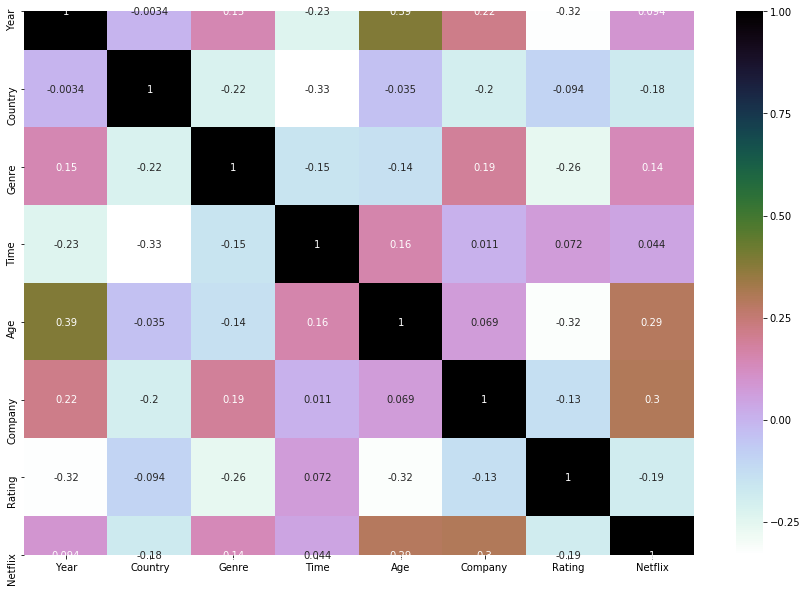

In [10]:
def display_heatmap(df):
    plt.figure(figsize=(15, 10))
    sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r')
    plt.show()
    
display_heatmap(netflix)

In [13]:
train, test = train_test_split(netflix_prepared, test_size = 0.25)

(31, 8)
(11, 8)
    Year  Country  Genre  Time  Age  Company  Rating  Netflix
35  2015        1      8   128   18       19    8.82        1
32  2008        1     10   121   12       21    7.88        0
25  2001        1      2   227   12        8    9.28        1
33  2006        1     10   119   15        5    7.91        0
14  1988        5      2   124    0        9    9.29        0
22  2010        3      2   127   12       22    9.29        0
0   2012        6      6   131   15       17    9.24        1
34  2008        1      5   152   15       20    9.33        1
10  2007        1      9   115    0       23    9.29        1
30  2008        1      0   125   12       16    8.91        1
1   2019        6      2   131   15       17    8.47        0
21  1992        6      2   119    0        3    9.30        0
40  2016        6      8   118   15        2    8.00        1
8   1978        1      4   172    0        9    9.40        0
37  2003        6      0   117   18       16    8.86  

In [14]:
train_X = train.drop('Netflix', axis=1, inplace=False)
print(train_X)
train_Y = train['Netflix']
print(train_Y)

    Year  Country  Genre  Time  Age  Company  Rating
35  2015        1      8   128   18       19    8.82
32  2008        1     10   121   12       21    7.88
25  2001        1      2   227   12        8    9.28
33  2006        1     10   119   15        5    7.91
14  1988        5      2   124    0        9    9.29
22  2010        3      2   127   12       22    9.29
0   2012        6      6   131   15       17    9.24
34  2008        1      5   152   15       20    9.33
10  2007        1      9   115    0       23    9.29
30  2008        1      0   125   12       16    8.91
1   2019        6      2   131   15       17    8.47
21  1992        6      2   119    0        3    9.30
40  2016        6      8   118   15        2    8.00
8   1978        1      4   172    0        9    9.40
37  2003        6      0   117   18       16    8.86
31  2009        1      8   157   12       23    7.61
5   1994        1      2   142   12        9    9.39
17  2008        1      7   104    0       23  

In [15]:
test_X = test.drop('Netflix', axis=1, inplace=False)
print(test_X)
test_Y = test['Netflix']
print(test_Y)

    Year  Country  Genre  Time  Age  Company  Rating
29  2001        2     10   152    0       18    9.24
16  1998        1      9   103   12       20    9.33
36  2018        1      2   102   12       13    8.92
13  2011        5      9   112   12        2    9.34
28  2013        1      8   131   12       18    7.66
15  2001        1      0   144   12       18    9.29
27  2013        6      0   125   15       17    7.97
4   2019        0      2   126   15       11    9.59
9   1997        1      3   194   15       15    9.35
24  2006        6      9   115   12        8    9.19
18  2006        1      9   109   12       10    8.66
29    0
16    1
36    1
13    0
28    1
15    0
27    1
4     0
9     1
24    1
18    1
Name: Netflix, dtype: int64


In [18]:
import warnings
warnings.filterwarnings('ignore')

nf_svm = svm.SVC()
nf_svm.fit(train_X, train_Y)
prediction = nf_svm.predict(test_X)

print('인식률:', metrics.accuracy_score(prediction, test_Y) * 100)

인식률: 36.36363636363637


In [23]:
nf_lr = LogisticRegression()
nf_lr.fit(train_X, train_Y)
prediction = nf_lr.predict(test_X)
print('인식률:', metrics.accuracy_score(prediction, test_Y) * 100)

인식률: 63.63636363636363


In [25]:
nf_dt = DecisionTreeClassifier()
nf_dt.fit(train_X,train_Y)
prediction = nf_dt.predict(test_X)
print('인식률:',metrics.accuracy_score(prediction,test_Y) * 100)

인식률: 45.45454545454545


In [31]:
nf_knn = KNeighborsClassifier(n_neighbors=3)
nf_knn.fit(train_X,train_Y)
prediction = nf_knn.predict(test_X)
print('인식률:',metrics.accuracy_score(prediction,test_Y) * 100)

인식률: 63.63636363636363
